<a href="https://colab.research.google.com/github/DevHyunseo/PoscoAcademy_Bigdata/blob/main/00_%EA%B3%BC%EC%A0%9C_%ED%83%90%EC%83%89%EC%A0%81%EB%B6%84%EC%84%9D(%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **탐색적분석**(통계분석)

#### python 패키지 불러오기

In [ ]:
# 데이터 구성 패키지: Series, DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 통계 분석 패키지
from scipy import stats
import scipy.stats
from statsmodels.stats.anova import anova_lm

### 1. 실습 (기술통계) : 자동차 연비 Data Set에서 기술통계치 구하기
- 시내에서 연비(mpg) 통계치 : 데이터 수,평균,중앙값,표준편차, min, max, Q1, Q3
- 고속도로에서 연비(mpg) 통계치 : 구동 방식별 데이터 수,평균,중앙값,표준편차, min, max, Q1, Q3 ( data.set : mycars.csv )

STEP ❶ 데이터 구성하기

In [ ]:
# mycars 데이터 가져오기
mycars = pd.read_csv("/home/piai/바탕화면/빅데이터주간/01 실습파일/1 Big Data 분석 기초/mycars.csv")
mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


STEP ❷ 기술통계분석_시내/자동차 Model 별 연비(mpg) 통계치

In [ ]:
# 1. 시내에서 연비(mpg) 통계치 : 기술통계량
mycars.describe().round(2)

,displacement,year,cylinder,mpg,highway_mileage
count,234.00,234.00,234.00,234.00,234.00
mean,3.47,2003.50,5.89,16.86,23.44
std,1.29,4.51,1.61,4.26,5.95
min,1.60,1999.00,4.00,9.00,12.00
25%,2.40,1999.00,4.00,14.00,18.00
50%,3.30,2003.50,6.00,17.00,24.00
75%,4.60,2008.00,8.00,19.00,27.00
max,7.00,2008.00,8.00,35.00,44.00


In [ ]:
# 2. 자동차 모델별, mpg별 통계치 : 모델별 mpg 데이터 subset
df = mycars[['model','mpg']]
df.head()

,model,mpg
0,a4,18
1,a4,21
2,a4,20
3,a4,21
4,a4,16


In [ ]:
# 자동차 모델별, mpg 기술통계량
df.groupby('model').describe()

mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

In [ ]:
# 2. 고속도로에서 구동 방식별, 연비(mpg) 통계치 : 구동 방식별 데이터 subset
# 자동차 구동 방식(driving) : 4, f, r

df = mycars[['driving','highway_mileage']]
df.head()

,driving,highway_mileage
0,f,29
1,f,29
2,f,31
3,f,30
4,f,26


In [ ]:
# 자동차 구동 방식별, 연비(mpg) 기술통계량
df.groupby('driving').describe()

# < 분석 결과 >
# # 1. driving 4 그룹
#     count: 103
#     mean: 19.17
#     std: 4.08
#     min: 12
#     25%: 17
#     50%: 18
#     75%: 22
#     max: 28
# # 2. f 그룹
#     count: 106
#     mean: 28.16
#     std: 4.21
#     min: 17
#     25%: 26
#     50%: 28
#     75%: 29
#     max: 44
# # 3. r 그룹
#     count: 25
#     mean: 21.00
#     std: 3.66
#     min: 15
#     25%: 17
#     50%: 21
#     75%: 24
#     max: 26

highway_mileage                                                   
                  count       mean       std   min   25%   50%   75%   max
driving                                                                   
4                 103.0  19.174757  4.078704  12.0  17.0  18.0  22.0  28.0
f                 106.0  28.160377  4.206881  17.0  26.0  28.0  29.0  44.0
r                  25.0  21.000000  3.662877  15.0  17.0  21.0  24.0  26.0

### 2. 실습 (기술통계) : 자동차 모델과 연비 Data Set에서 기술통계치 구하기
- 자동차의 모델과 연비(mpg)에 대한 자료를 조사한 table에서 범주형 변수인 구동방식, 모델에 대해 counts, percents, cumulative counts, cumulative percents를 계산하기

In [ ]:
# 자동차 구동방식 counts
count = mycars['driving'].value_counts().sort_index()
count

4    103
f    106
r     25
Name: driving, dtype: int64

In [ ]:
# 자동차 구동방식 percents
percent = count / sum(count) * 100
percent

4    44.017094
f    45.299145
r    10.683761
Name: driving, dtype: float64

In [ ]:
# 자동차 구동방식 cumulative counts
cumcnt = np.cumsum(count)
cumcnt

4    103
f    209
r    234
Name: driving, dtype: int64

In [ ]:
# 자동차 구동방식 cumulative percents
cumpct = np.cumsum(percent) #비율을 누적
cumpct

4     44.017094
f     89.316239
r    100.000000
Name: driving, dtype: float64

In [ ]:
# DataFrame으로 취합
df = pd.DataFrame({'Count': count,
                'CumCnt': cumcnt,
                'Percent': percent,
                'CumPct': cumpct})
df

,Count,CumCnt,Percent,CumPct
4,103,103,44.017094,44.017094
f,106,209,45.299145,89.316239
r,25,234,10.683761,100.000000


In [ ]:
# 자동차 모델 counts
count = mycars['model'].value_counts().sort_index()
count

4runner 4wd                6
a4                         7
a4 quattro                 8
a6 quattro                 3
altima                     6
c1500 suburban 2wd         5
camry                      7
camry solara               7
caravan 2wd               11
civic                      9
corolla                    5
corvette                   5
dakota pickup 4wd          9
durango 4wd                7
expedition 2wd             3
explorer 4wd               6
f150 pickup 4wd            7
forester awd               6
grand cherokee 4wd         8
grand prix                 5
gti                        5
impreza awd                8
jetta                      9
k1500 tahoe 4wd            4
land cruiser wagon 4wd     2
malibu                     5
maxima                     3
mountaineer 4wd            4
mustang                    9
navigator 2wd              3
new beetle                 6
passat                     7
pathfinder 4wd             4
ram 1500 pickup 4wd       10
range rover   

In [ ]:
# 자동차 모델 percents
percent = count / sum(count) * 100
percent

4runner 4wd               2.564103
a4                        2.991453
a4 quattro                3.418803
a6 quattro                1.282051
altima                    2.564103
c1500 suburban 2wd        2.136752
camry                     2.991453
camry solara              2.991453
caravan 2wd               4.700855
civic                     3.846154
corolla                   2.136752
corvette                  2.136752
dakota pickup 4wd         3.846154
durango 4wd               2.991453
expedition 2wd            1.282051
explorer 4wd              2.564103
f150 pickup 4wd           2.991453
forester awd              2.564103
grand cherokee 4wd        3.418803
grand prix                2.136752
gti                       2.136752
impreza awd               3.418803
jetta                     3.846154
k1500 tahoe 4wd           1.709402
land cruiser wagon 4wd    0.854701
malibu                    2.136752
maxima                    1.282051
mountaineer 4wd           1.709402
mustang             

In [ ]:
# 자동차 모델 cumulative counts
cumcnt = np.cumsum(count)
cumcnt

4runner 4wd                 6
a4                         13
a4 quattro                 21
a6 quattro                 24
altima                     30
c1500 suburban 2wd         35
camry                      42
camry solara               49
caravan 2wd                60
civic                      69
corolla                    74
corvette                   79
dakota pickup 4wd          88
durango 4wd                95
expedition 2wd             98
explorer 4wd              104
f150 pickup 4wd           111
forester awd              117
grand cherokee 4wd        125
grand prix                130
gti                       135
impreza awd               143
jetta                     152
k1500 tahoe 4wd           156
land cruiser wagon 4wd    158
malibu                    163
maxima                    166
mountaineer 4wd           170
mustang                   179
navigator 2wd             182
new beetle                188
passat                    195
pathfinder 4wd            199
ram 1500 p

In [ ]:
# 자동차 모델 cumulative percents
cumpct = np.cumsum(percent)
cumpct

4runner 4wd                 2.564103
a4                          5.555556
a4 quattro                  8.974359
a6 quattro                 10.256410
altima                     12.820513
c1500 suburban 2wd         14.957265
camry                      17.948718
camry solara               20.940171
caravan 2wd                25.641026
civic                      29.487179
corolla                    31.623932
corvette                   33.760684
dakota pickup 4wd          37.606838
durango 4wd                40.598291
expedition 2wd             41.880342
explorer 4wd               44.444444
f150 pickup 4wd            47.435897
forester awd               50.000000
grand cherokee 4wd         53.418803
grand prix                 55.555556
gti                        57.692308
impreza awd                61.111111
jetta                      64.957265
k1500 tahoe 4wd            66.666667
land cruiser wagon 4wd     67.521368
malibu                     69.658120
maxima                     70.940171
m

In [ ]:
# DataFrame으로 취합
df = pd.DataFrame({'Count': count,
                'CumCnt': cumcnt,
                'Percent': percent,
                'CumPct': cumpct})
df

,Count,CumCnt,Percent,CumPct
4runner 4wd,6,6,2.564103,2.564103
a4,7,13,2.991453,5.555556
a4 quattro,8,21,3.418803,8.974359
a6 quattro,3,24,1.282051,10.256410
altima,6,30,2.564103,12.820513
c1500 suburban 2wd,5,35,2.136752,14.957265
camry,7,42,2.991453,17.948718
camry solara,7,49,2.991453,20.940171
caravan 2wd,11,60,4.700855,25.641026
civic,9,69,3.846154,29.487179


### 3. 실습(확률계산) : 대한민국 남성의 20-30대 키를 측정한 결과, 평균 175cm, 표준편차 5cm이다. 나의 키가 180cm일 경우에 나는 몇 % 범위에 위치할까요?

In [ ]:
mu = 175
sigma = 5
x = 180
prob = stats.norm.cdf(x, mu, sigma)
print("{0}cm일 경우 상위 {1:.2f}% 범위에 위치한다.".format(x, (1-prob)*100))

180cm일 경우 상위 15.87% 범위에 위치한다.


### 4. 실습(확률계산) : 어떤 자동차 1리터당 주행거리가 평균 12km, 표준편차 3km인 정규분포를 이룬다. 1) 1리터를 가지고 9km 이상 15km 이하를 달릴 확률은 얼마인가? 2) 1리터를 가지고 15km 이상을 달릴 확률은 얼마인가요?

In [ ]:
mu = 12
sigma = 3
x1 = 9
x2 = 15
prob1 = stats.norm.cdf(x1, mu, sigma)
prob2 = stats.norm.cdf(x2, mu, sigma)
print("{0}km 이상 {1}km 이하를 달릴 확률은 {2:.2f}%에 해당한다.".format(x1, x2, (prob2-prob1)*100))
print("{0}km 이상 달릴 확률은 {1:.2f}%에 해당한다.".format(x2, (1-prob2)*100))

9km 이상 15km 이하를 달릴 확률은 68.27%에 해당한다.
15km 이상 달릴 확률은 15.87%에 해당한다.


### 5. 실습(t분포) : 확률변수 t는 자유도가 100인 t-분포를 따른다. t값이 2.0일 때 P(T <=t )를 계산하세요.

In [ ]:
t = 2.0
df = 100
prob = stats.t.cdf(t, df)
print("P(T<=t): {:.3f}".format(prob))

P(T<=t): 0.976


### 6. 실습(t분포) : 확률변수 x^2는 자유도가 8인 x^2 -분포를 따른다. x^2 값이 3.0일 때, P(X <= x^2)을 계산하시오.

In [ ]:
chisq = 3.0
df = 8
prob = stats.chi2.cdf(chisq, df)
print("P(T<={0}): {1:.4f}".format(chisq, prob))

P(T<=3.0): 0.0656


### 7. 실습(F분포) : 확률변수 F는 각각 자유도가 10, 100인 F분포를 따른다. F값이 1.5일 때, P(X <= F)를 계산하시오.

In [ ]:
f = 1.5 #F값
dfnum = 10 #자유도
dfden = 100
prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print("P(X<=F): {:.3f}".format(prob))

P(X<=F): 0.850


### 8. 실습(이항분포) : 도장공정에서 광택도 불량이 30%나 된다고 함. 5대의 차량을 임의로 선택했을 때 불량대수가 0, 1, 2, 3, 4, 5대가 나올 확률을 계산하시오.

In [ ]:
n = 5 #불량대수
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=0.3)
    print("P(X={0}) = {1:.3f}".format(i, prob))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


### 9. 실습(정규성 검정) : 실습파일에서 Mat_A와 Mat_B에 대해 정규성을 검정하세요.

In [ ]:
# 2sample_t_test.csv 데이터 가져오기
df = pd.read_csv("/home/piai/바탕화면/빅데이터주간/01 실습파일/1 Big Data 분석 기초/2sample_t_test.csv")
df.head()


,Mat_A,Mat_B
0,73.4,68.7
1,77.0,71.4
2,73.7,69.8
3,73.3,75.3
4,73.1,71.3


In [ ]:
# Mat_A에 대한 정규성 검정 : shapiro_wilk test
statistic, p = stats.shapiro(df['Mat_A'])
print("Shapiro-Wilk test : statistic={}, p_value={}\n".format(statistic, p))
print("정규성 검정시, 5% 유의수준 사용시 p-value가 0.05보다 크므로 Mat_A분포는 정규분포를 따른다 할 수 있다.\n")

Shapiro-Wilk test : statistic=0.906264066696167, p_value=0.2563020884990692

정규성 검정시, 5% 유의수준 사용시 p-value가 0.05보다 크므로 Mat_A분포는 정규분포를 따른다 할 수 있다.



In [ ]:
# Mat_B에 대한 정규성 검정 : shapiro_wilk test
statistic, p = stats.shapiro(df['Mat_B'])
print("Shapiro-Wilk test : statistic={}, p_value={}\n".format(statistic, p))

print("정규성 검정시, 5% 유의수준 사용시 p-value가 0.05보다 크므로 Mat_B분포는 정규분포를 따른다 할 수 있다.\n")

Shapiro-Wilk test : statistic=0.9729753732681274, p_value=0.9169775247573853

정규성 검정시, 5% 유의수준 사용시 p-value가 0.05보다 크므로 Mat_B분포는 정규분포를 따른다 할 수 있다.



### 10. 실습(모평균 구간추정) : 새로운 품종의 감자 20box를 랜덤추출하여 무게를 측정할 결과가 다음과 같음. (모표준편차는 3.8일 때) 이 자료로부터 신품종 배추의 평균무게에 대한 95% 신뢰구간을 구하시오.

In [ ]:
df = pd.DataFrame({'potatos':[18,18,20,21,20,23,19,
                            18,17,21,22,20,20,21,
                            20,19,19,18,17,19]})
df.head()

,potatos
0,18
1,18
2,20
3,21
4,20


In [ ]:
#정규 분포 구간 추정 함수 실행
lower, upper = stats.norm.interval(0.95, loc = np.mean(df), scale=0.38/np.sqrt(20))
print("95% 신뢰구간 : ({0}, {1})".format(lower.round(2), upper.round(2)))

95% 신뢰구간 : ([19.33], [19.67])


/home/piai/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### 11. 실습(모평균 구간추정) : 제품개발자는 새로 개발된 강종의 평균 인장강도 70kg/mm^2으로 기대하고 있음. 이를 엄증하기 위해 시험 생산되는 강종 중 임의로 20개의 코일을 대상으로 랜덤하게 시편을 채취. 상기 자료로 부터 표본평균 71.50kg/mm^2, 표본표준편차 1.933km/mm^2임을 알았음. 이 모평균값의 95% 신뢰구간을 추청하시오.

In [ ]:
df = pd.DataFrame({'kangjong':[73,71,74,69,70,73,70,
                             68,75,72,70,72,73,70,
                             70,72,71,70,75,72]})
df.head()

,kangjong
0,73
1,71
2,74
3,69
4,70


In [ ]:
#정규 분포 구간 추정 함수 실행
lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale = stats.sem(df))
print("신뢰구간 : ({0},{1})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([70.6],[72.4])


/home/piai/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### 12. 실습(1-sample t-test) : 고객 서비스센터의 고객만족도 평균 78.0이다. 개선활동을 완료한 후 다음과 같은 10개의 고객만족도 데이터를 얻었다. 개선활동이 만족도를 변화시켰는가?

In [ ]:
# 귀무가설 : mu = 78.0
# 대립가설 : mu != 78.0

df = pd.DataFrame({'satisfaction': [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4,
                                    78.1, 79.2]})
df.head()

,satisfaction
0,85.0
1,79.0
2,79.1
3,79.9
4,81.6


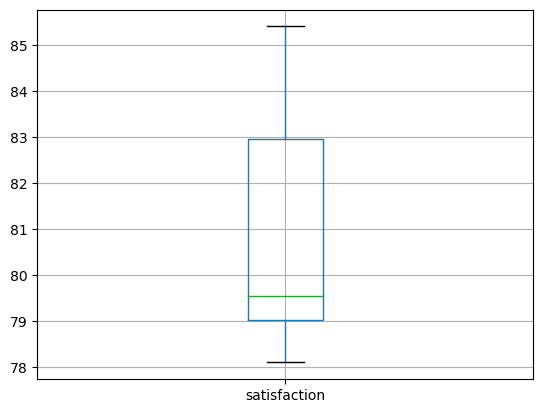

In [ ]:
df.boxplot()
plt.show()

In [ ]:
#정규성 검정
statistic, p = stats.shapiro(df['satisfaction'])
print("statistic={}, p-value={}".format(statistic,p))

#1-sample t-test
t_result = stats.ttest_1samp(df, 78.0)

#1-sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), \
       t_result.pvalue.round(3)

#1-sample t-test의 t값 p값 출력
print("<<1-sample t-test>>")
print("t 통계량 : {}".format(t))
print("p-vale : {}".format(p))
print("검정결과 : 유의수준 5%에서 검정결과 P-값이 0.001이므로 개선활동이 만족도를 변화시켰다고 볼 수 있다")

statistic=0.8473217487335205, p-value=0.0539751797914505
<<1-sample t-test>>
t 통계량 : [3.379]
p-vale : [0.008]
검정결과 : 유의수준 5%에서 검정결과 P-값이 0.001이므로 개선활동이 만족도를 변화시켰다고 볼 수 있다


### 13. 실습(2-sample t-test) : 제품을 a공급자와 b공급자로부터 제품을 받아 두께를 측정해서 다음의 데이터를 얻었다. 공급자 간에 모평균 차이가 있다고 할 수 있는가? (유의수준 a=0.05)

In [ ]:
# 귀무가설 : mu(A) = mu(B)
# 대립가설 : mu(A) != mu(B)
df = pd.DataFrame({'A': [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344],
                   'B': [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.800]})
df.head()

,A,B
0,1.883,1.435
1,1.715,1.572
2,1.799,1.486
3,1.768,1.511
4,1.711,1.457


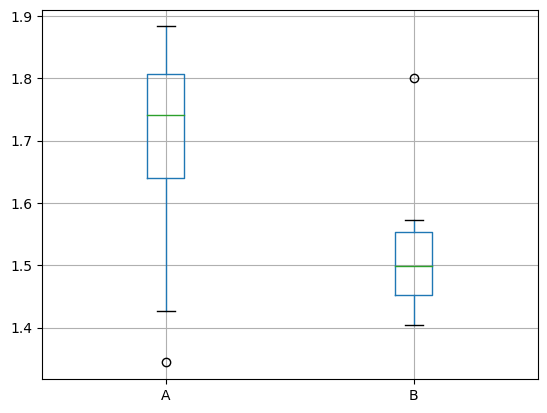

In [ ]:
df.boxplot(['A', 'B'])
plt.show()

In [ ]:
#정규성 검정
statistic, p = stats.shapiro(df['A'])
print("statistic={}, p-value={}".format(statistic,p))

statistic, p = stats.shapiro(df['B'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.8425754904747009, p-value=0.08004532009363174
statistic=0.8393934369087219, p-value=0.07424874603748322


In [ ]:
#등분산 검정
stats.bartlett(df['A'], df['B'])

BartlettResult(statistic=1.2899966318541203, pvalue=0.25604857136527204)

In [ ]:
# 2-Sample t-test
t_result = stats.ttest_ind(df['A'], df['B'])

# 2-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [ ]:
print( "<<2-Sample t-test>>")
print( " t: {} " .format(t))
print( " p: {} " .format(p))
print("검정 결과 :유의수준 5%에서 검정결과 P-값이 0.073이므로 유의수준 5%에서 공급자 간에 모평균에 차이가 있다고 할 수 없다.")

<<2-Sample t-test>>
 t: 1.94 
 p: 0.073 
검정 결과 :유의수준 5%에서 검정결과 P-값이 0.073이므로 유의수준 5%에서 공급자 간에 모평균에 차이가 있다고 할 수 없다.


### 14. 실습(paired t-test) 회사원 10명에 대해 영어점수가 학원가기 전/후에 영어점수가 짝을 이루고 있다. 회사원들의 성적은 학원가기 전 후에 대해 차이가 있는지 검정하라. (유의수준 0.05)

In [ ]:
# 귀무가설 : mu(Before) = mu(After)
# 대립가설 : mu(Before) != mu(After)

df1 = pd.DataFrame({'before': [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'after': [710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

# Paired t-test
t_result_A = stats.ttest_rel(df1, df2)

# Paired t-test의 t값 p값 저장
t, p = t_result_A.statistic.round(4), t_result_A.pvalue.round(4)

In [ ]:
# Paired t-test의 t값 p값 출력
print("<<Paired t-test>>")
print(" t: {} " .format(t))
print(" p: {} " .format(p))
print("검정 결과 : 유의수준 5%의 양측검정에서 (P-값 : 0.0497 > 양측검정 유의수준 : 0.025)이므로 회사원들의 성적은 학원가기 전후에 차이가 있다고 할 수 없다.")

<<Paired t-test>>
 t: [-2.2661] 
 p: [0.0497] 
검정 결과 : 유의수준 5%의 양측검정에서 (P-값 : 0.0497 > 양측검정 유의수준 : 0.025)이므로 회사원들의 성적은 학원가기 전후에 차이가 있다고 할 수 없다.


### 15. 실습(1 proportion test) : 동전이 정상적인가를 검정하기 위해 100번을 던져본 결과, 앞면이 40번 나왔으며 뒷면이 60번 나왔다. 이 동전은 정상인가를 유의수준 a=0.05이다. 정상적인 동전을 던질 때 앞면이 나올 확률은 50%이다.

In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
# 귀무가설 : p = 0.5
# 대립가설 : p != 0.5

# 변수 선언
count = 40
n_obs = 100
value = 0.5

# 1 Proportion test 실행
z, p = proportions_ztest(count, n_obs, value)

In [ ]:
# 1 Proportion test 결과 출력
print( "<<1 Proportion test>>")
print( ' z: {0:0.3f}' .format(z))
print( ' p: {0:0.3f}'.format(p))
print("유의수준 5%의 양측검정에서 P-값이 0.041이므로 (p-값 : 0.041 > 0.025)이기 때문에 동전은 정상적이라 할 수 있다.")

<<1 Proportion test>>
 z: -2.041
 p: 0.041
유의수준 5%의 양측검정에서 P-값이 0.041이므로 (p-값 : 0.041 > 0.025)이기 때문에 동전은 정상적이라 할 수 있다.


### 16. 실습(2 proportion test) : 동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과 아래롸 같다. 두 공정의 불량률이 같다고 할 수 있는가?

In [ ]:
# 귀무가설 : 공장 A의 불량률 = 공장 B의 불량율
# 대립가설 : 공장 A의 불량률 != 공장 B의 불량율

count = np.array([14, 5])
nobs = np.array([1200, 1200])

# 2 Proportion test 실행
z, p = proportions_ztest(count, nobs)

In [ ]:
print( "2 Proportion test ")
print( ' z: {0:0.3f}' .format(z))
print( ' p: {0:0.3f}'.format(p))
print(" 분석 결과 : 유의수준 5%의 양측검정에서 P-값이 0.038이므로 (p-값 : 0.038 > 0.025)이기 때문에 두 공장의 불량률은 차이가 있다고 할 수 없다.")

2 Proportion test 
 z: 2.073
 p: 0.038
 분석 결과 : 유의수준 5%의 양측검정에서 P-값이 0.038이므로 (p-값 : 0.038 > 0.025)이기 때문에 두 공장의 불량률은 차이가 있다고 할 수 없다.


### 17. 실습(카이제곱 검정) : 노트북 컴퓨터의 6가지 제품(A,B,C,D,E,F)에 대하여 7가지 제품의 이미지를 중복 선택할 수 있도록 32명의 소비자를 대상으로 설문 조사한 table이다. 각 제품에 대한 이미지에 대해 차이가 있겠는가?

In [ ]:
# 귀무가설 : 각 제품에 대한 이미지의 차이가 없다.
# 대립가설 : 각 제품에 대한 이미지의 차이가 있다.

df = pd.DataFrame({'A/S': [18,8,4,4,3,3],
                   '가격': [1,2,1,1,1,25],
                   '성능': [8,14,3,2,3,8],
                   '확장성':[7,5,4,3,1,10],
                   '디자인':[10,5,9,2,1,2],
                   '안정성':[9,9,5,7,1,1],
                   '기능성':[10,4,4,3,1,7]})

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))
print( ' expected value: \n{}' .format(expected.round(3)))
print(" 분석 결과 : P-value < 0.05 이므로 유의수준 5%에서 각 제품에 대해 이미지에 대한 차이가 있다고 할 수 있다.")

chi-square test 
 chisq: 98.274
 p: 0.000
 degree pf freedom: 30
 expected value: 
[[11.004  8.528 10.454  8.253  7.978  8.803  7.978]
 [ 8.21   6.362  7.799  6.157  5.952  6.568  5.952]
 [ 5.24   4.061  4.978  3.93   3.799  4.192  3.799]
 [ 3.843  2.978  3.651  2.882  2.786  3.074  2.786]
 [ 1.921  1.489  1.825  1.441  1.393  1.537  1.393]
 [ 9.782  7.581  9.293  7.336  7.092  7.825  7.092]]
 분석 결과 : P-value < 0.05 이므로 유의수준 5%에서 각 제품에 대해 이미지에 대한 차이가 있다고 할 수 있다.


### 18. 실습(ANOVA) : 철강의 청정도를 높이기 위해 제강공정에서 2차 정련을 시시하는데, 강종별로 2차 정련시간의 차이가 있는지와 tpye별로 2차 정련 시간에 차이가 있는지 검정하라 (유의수준 0.05)

In [ ]:
# 귀무가설 : type별 2차정련 시간간에 차이가 없다.
# 대립가설 : type별 2차정련 시간간에 차이가 있다.

df = pd.read_csv("/home/piai/바탕화면/빅데이터주간/01 실습파일/1 Big Data 분석 기초/ANOVA.csv")
df.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


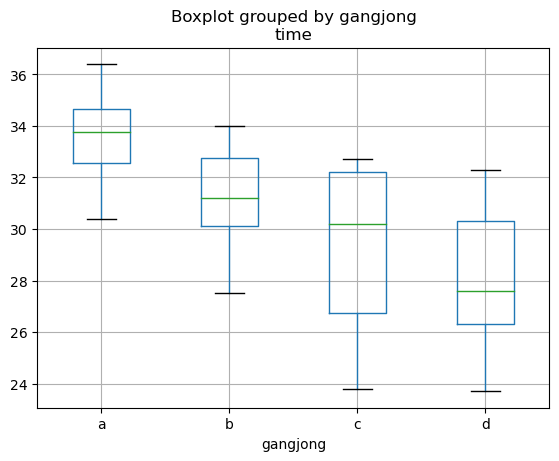

In [ ]:
df.boxplot(column = 'time', by = 'gangjong')
plt.show()

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols('time ~ C(gangjong)', df).fit()
anova_results = sm.stats.anova_lm(model)
print(anova_results)

               df      sum_sq    mean_sq         F    PR(>F)
C(gangjong)   3.0  104.603333  34.867778  4.171868  0.019013
Residual     20.0  167.156667   8.357833       NaN       NaN


### 18. 실습(ANOVA) : 초코칩의 강도와 재료 반죽온도간에 관계를 분석하기 위한 상관분석을 하세요.

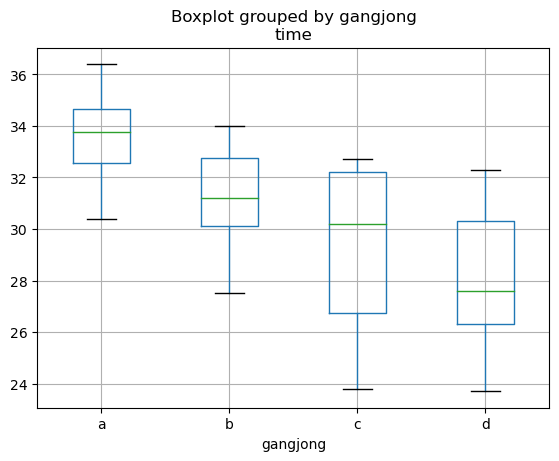

In [ ]:
# 귀무가설 : gangjong별 2차정련 시간간에 차이가 없다.
# 대립가설 : gangjong별 2차정련 시간간에 차이가 있다.

df.boxplot('time','gangjong') #강종별 2차 정련시간에 대한 분포확인
plt.show()

In [ ]:
model = smf.ols('time ~ C(type)', df).fit()
print(anova_lm(model))

            df      sum_sq    mean_sq         F   PR(>F)
C(type)    1.0   82.881667  82.881667  9.653816  0.00514
Residual  22.0  188.878333   8.585379       NaN      NaN


In [ ]:
df1 = [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5]
df2 = [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]

corr, pval = stats.pearsonr(df1, df2)

print( "Correlation Analysis ")
print( ' corr: {0:0.3f}' .format(corr))
print( ' p-value : {0:0.3f}'.format(pval))
print("분석 결과 : 상관계수가 -0.723이고 p-value가 0.000이므로 유의수준 5%에서 초코칩의 강도와 재료 반죽온도간에 강한 음의 상관관계를 가진다고 할 수 있다.")